### Importing libraries and data

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline
import warnings
warnings.filterwarnings("ignore")

In [2]:

df = pd.read_csv("/Users/schand/Documents/ML Homework 1/WA_Fn-UseC_-Telco-Customer-Churn 2.csv")
#
df['TotalCharges'] = pd.to_numeric(df['TotalCharges'],errors = 'coerce')
df.head()

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,...,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,7590-VHVEG,Female,0,Yes,No,1,No,No phone service,DSL,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,No
1,5575-GNVDE,Male,0,No,No,34,Yes,No,DSL,Yes,...,Yes,No,No,No,One year,No,Mailed check,56.95,1889.50,No
2,3668-QPYBK,Male,0,No,No,2,Yes,No,DSL,Yes,...,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,Yes
3,7795-CFOCW,Male,0,No,No,45,No,No phone service,DSL,Yes,...,Yes,Yes,No,No,One year,No,Bank transfer (automatic),42.30,1840.75,No
4,9237-HQITU,Female,0,No,No,2,Yes,No,Fiber optic,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,70.70,151.65,Yes


In [3]:
# dropping customerID which had no significance
df = df.drop(['customerID'],axis=1)
df = df[df['tenure']!=0]
df = df.dropna(axis=0)
#df_new = df.series.replace(to_replace=['no', 'yes'], value=[0, 1])
df.head()

,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,Female,0,Yes,No,1,No,No phone service,DSL,No,Yes,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,No
1,Male,0,No,No,34,Yes,No,DSL,Yes,No,Yes,No,No,No,One year,No,Mailed check,56.95,1889.50,No
2,Male,0,No,No,2,Yes,No,DSL,Yes,Yes,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,Yes
3,Male,0,No,No,45,No,No phone service,DSL,Yes,No,Yes,Yes,No,No,One year,No,Bank transfer (automatic),42.30,1840.75,No
4,Female,0,No,No,2,Yes,No,Fiber optic,No,No,No,No,No,No,Month-to-month,Yes,Electronic check,70.70,151.65,Yes


In [4]:
df_catg = df.select_dtypes(include=['object'])
df_num = df.select_dtypes(include=['number'])
#df_num = df_num.join(df[['TotalCharges']])
df_num.head()

,SeniorCitizen,tenure,MonthlyCharges,TotalCharges
0,0,1,29.85,29.85
1,0,34,56.95,1889.50
2,0,2,53.85,108.15
3,0,45,42.30,1840.75
4,0,2,70.70,151.65


#### 1. Visualize the univariate distribution of each input variable and the target variable “churn”.

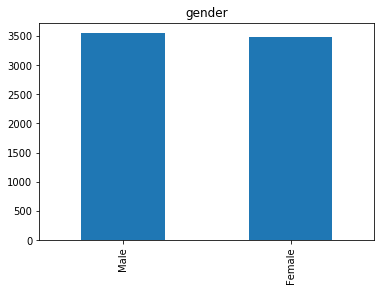

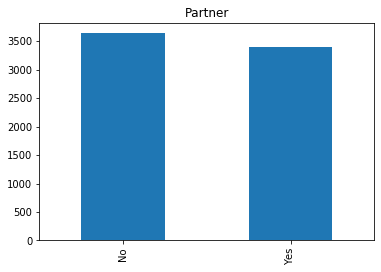

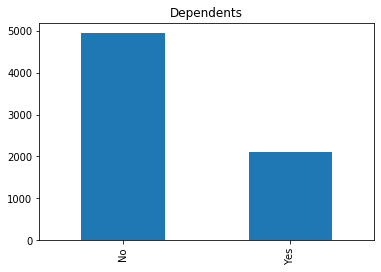

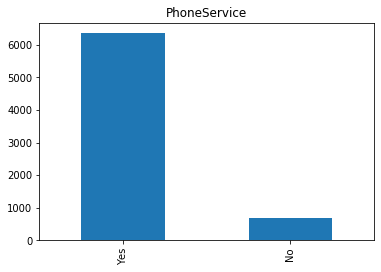

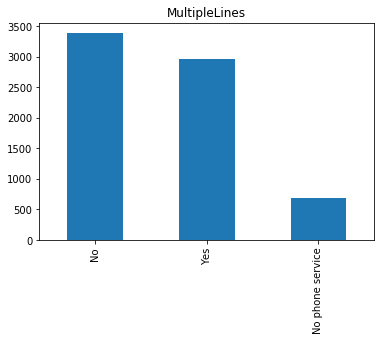

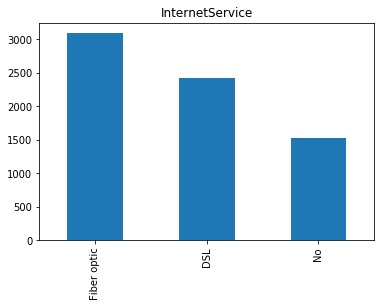

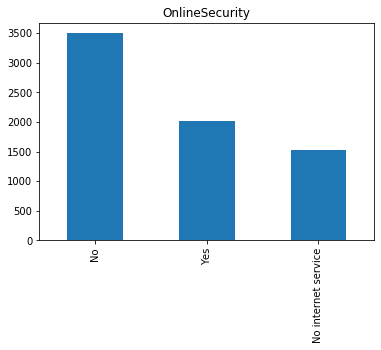

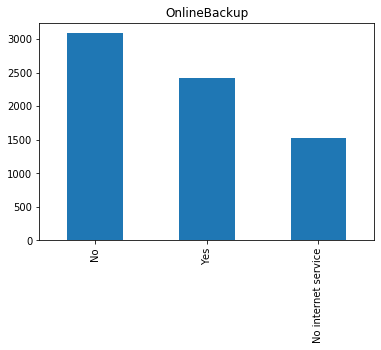

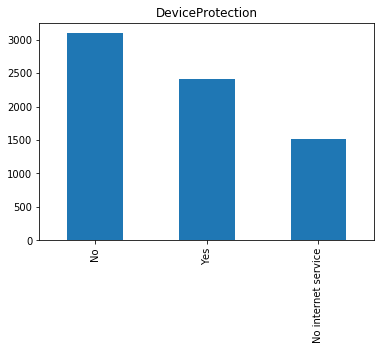

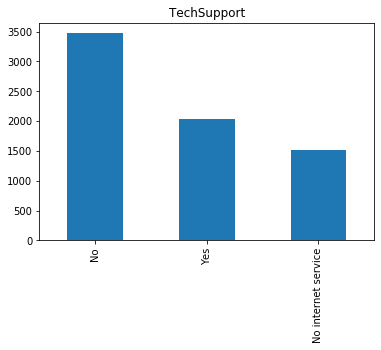

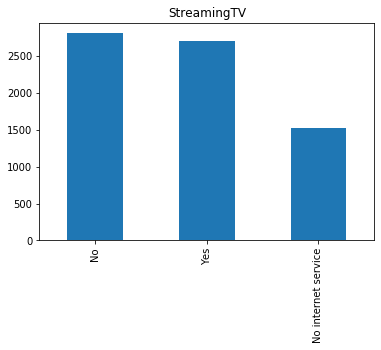

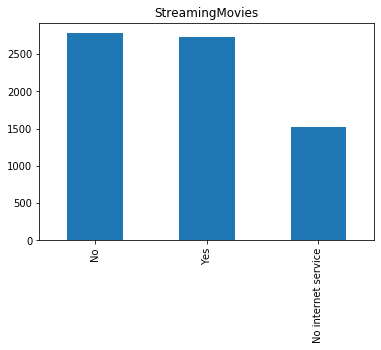

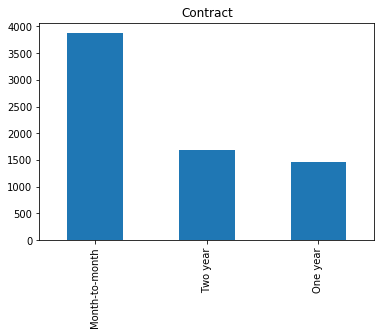

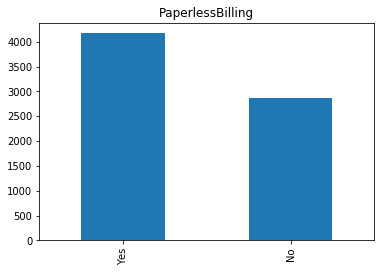

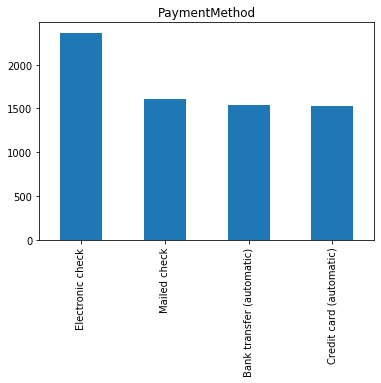

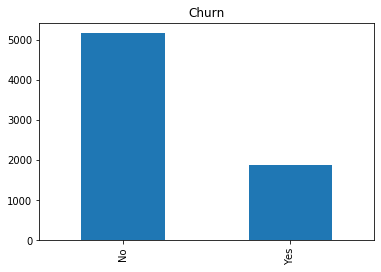

In [5]:
for i in range(0,len(df_catg.columns)):
    plt.figure();
    df_catg.iloc[:,i].value_counts().plot.bar(title = df_catg.columns[i])

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x1a1978ffd0>,
      dtype=object)

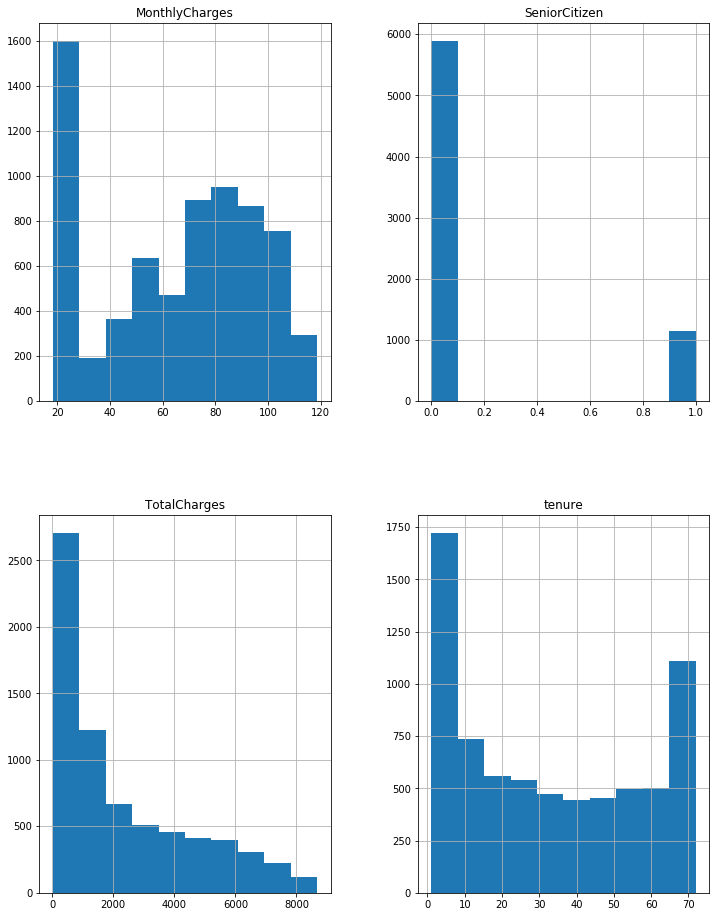

In [6]:
df_num.hist(figsize = (12,16))

#### 2.Split data into training and test sets. Build a pipeline for dealing with categorical variables. Evaluate logistic regression, support vector machines, k-nearest neighbors, and decision trees using cross-validation. How different are the results? How does scaling the numerical features with StandardScaler influence the results?

In [7]:
#Split data in train and test set
df_train, df_test = np.split(df, [int(.8*len(df))])
df_train_catg = df_train.select_dtypes(include=['object'])
df_train_num = df_num.select_dtypes(include=['number'])
df_train_catg = df_train_catg.drop(['Churn'],axis=1)
df_train_num.head()

,SeniorCitizen,tenure,MonthlyCharges,TotalCharges
0,0,1,29.85,29.85
1,0,34,56.95,1889.50
2,0,2,53.85,108.15
3,0,45,42.30,1840.75
4,0,2,70.70,151.65


In [8]:
X_train = df_train.drop(['Churn'],axis = 1)
y_train = df_train['Churn']

In [9]:
from sklearn.preprocessing import OneHotEncoder, StandardScaler
from sklearn.compose import ColumnTransformer
from sklearn.model_selection import cross_val_score
ct = ColumnTransformer([
    ('ohe',OneHotEncoder(),df_train_catg.columns),
     ])
df_trans = ct.fit_transform(X_train)

In [10]:
from sklearn.pipeline import Pipeline
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import r2_score
model = LogisticRegression()
pipeline = Pipeline([('transformer',ct),
                 ('model',model)
                ])
pipeline.fit(X_train,y_train)
cvs = cross_val_score(pipeline, X_train,y_train,scoring = 'accuracy', cv=5).mean()
print('Cross Validation Score for logistic regression is',cvs)

Cross Validation Score for logistic regression is 0.7845333333333333


In [11]:
from sklearn import svm
model_svm_linear = svm.SVC(kernel='linear')
pipeline_svm = Pipeline([('transformer_svm',ct),
                 ('model_svm',model_svm_linear)
                ])
pipeline_svm.fit(X_train,y_train)
cvs = cross_val_score(pipeline_svm, X_train,y_train,scoring = 'accuracy', cv=5).mean()
print('Cross Validation Score for support vector machine is',cvs)

Cross Validation Score for support vector machine is 0.7836444444444444


In [12]:
from sklearn.neighbors import KNeighborsClassifier
model_knbrs = KNeighborsClassifier(n_neighbors= 15)
pipeline_knbrs = Pipeline([('transformer_knbrs',ct),
                 ('model_knbrs',model_knbrs)
                ])
pipeline_knbrs.fit(X_train,y_train)
cvs = cross_val_score(pipeline_knbrs, X_train,y_train,scoring = 'accuracy', cv=5).mean()
print('Cross Validation Score for k-nearest neighbours is',cvs)

Cross Validation Score for k-nearest neighbours is 0.7660444444444444


In [13]:
from sklearn import tree
model_dtree = tree.DecisionTreeClassifier()
pipeline_dtree = Pipeline([('transformer_dtree',ct),
                 ('model_dtree',model_dtree)
                ])
pipeline_dtree.fit(X_train,y_train)
cvs = cross_val_score(pipeline_dtree, X_train,y_train,scoring = 'accuracy', cv=5).mean()
print('Cross Validation Score for decision tree is',cvs)

Cross Validation Score for decision tree is 0.7264


#### Scaling the numerical features with StandardScaler

In [14]:
ct = ColumnTransformer([
    ('ohe',OneHotEncoder(),df_train_catg.columns),
    ('ss', StandardScaler(), df_train_num.columns)
     ])
df_trans = ct.fit_transform(X_train)
X_catg_trans_list = ct.transformers_
X_catg_trans = ct.named_transformers_['ohe'].categories_

In [15]:
pipeline = Pipeline([('transformer',ct),
                 ('model',model)
                ])
pipeline.fit(X_train,y_train)
cvs = cross_val_score(pipeline, X_train,y_train,scoring = 'accuracy', cv=5).mean()
print('Cross Validation Score for logistic regression is',cvs)

Cross Validation Score for logistic regression is 0.8021333333333333


In [16]:
pipeline_svm = Pipeline([('transformer_svm',ct),
                 ('model_svm',model_svm_linear)
                ])
pipeline_svm.fit(X_train,y_train)
cvs = cross_val_score(pipeline_svm, X_train,y_train,scoring = 'accuracy', cv=5).mean()
print('Cross Validation Score for support vector machine is',cvs)

Cross Validation Score for support vector machine is 0.8012444444444444


In [17]:
pipeline_knbrs = Pipeline([('transformer_knbrs',ct),
                 ('model_knbrs',model_knbrs)
                ])
pipeline_knbrs.fit(X_train,y_train)
cvs = cross_val_score(pipeline_knbrs, X_train,y_train,scoring = 'accuracy', cv=5).mean()
print('Cross Validation Score for k-nearest neighbours is',cvs)

Cross Validation Score for k-nearest neighbours is 0.7799111111111111


In [18]:
pipeline_dtree = Pipeline([('transformer_dtree',ct),
                 ('model_dtree',model_dtree)
                ])
pipeline_dtree.fit(X_train,y_train)
cvs = cross_val_score(pipeline_dtree, X_train,y_train,scoring = 'accuracy', cv=5).mean()
print('Cross Validation Score for decision tree is',cvs)

Cross Validation Score for decision tree is 0.7223111111111111


#### Tuning Parameters 

### Logistic

In [19]:
from sklearn.model_selection import GridSearchCV
# prepare a range of C's values to test
Cs = np.array([100000, 10000, 1000, 100,10,1,0.1,0.01,0.001,0.0001])
# create and fit a ridge regression model, testing each alpha
grid = GridSearchCV(estimator=LogisticRegression(), param_grid=dict(C=Cs))
pipeline_1 = Pipeline([('transformer',ct),
                 ('model',grid)
                ])
pipeline_1.fit(X_train, y_train)
# summarize the results of the grid search
print(grid.best_score_)
print(grid.best_estimator_.C)
print(grid.cv_results_)

0.8033777777777779
100000.0
{'mean_fit_time': array([0.02843404, 0.02702494, 0.02705259, 0.02795873, 0.03771782,
       0.03761573, 0.02688632, 0.01649637, 0.01149564, 0.00918169]), 'std_fit_time': array([2.32527719e-03, 1.81257702e-03, 1.34165485e-03, 2.01384717e-03,
       6.72504304e-03, 1.85252219e-03, 2.00045446e-03, 1.20992333e-03,
       1.14629749e-04, 3.61932910e-05]), 'mean_score_time': array([0.0016664 , 0.00164003, 0.00164933, 0.00170999, 0.00165076,
       0.0018106 , 0.00164819, 0.00167737, 0.0016355 , 0.00162249]), 'std_score_time': array([2.61625040e-05, 7.51438478e-06, 3.64211206e-06, 1.03688939e-04,
       1.39342555e-05, 3.02508041e-04, 1.47911781e-05, 5.69353551e-05,
       1.82245390e-05, 8.82264722e-06]), 'param_C': masked_array(data=[100000.0, 10000.0, 1000.0, 100.0, 10.0, 1.0, 0.1, 0.01,
                   0.001, 0.0001],
             mask=[False, False, False, False, False, False, False, False,
                   False, False],
       fill_value='?',
          

Text(0.5, 1.0, 'Dependence of Validation Score on Parameters')

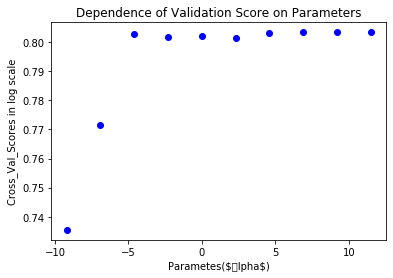

In [20]:
cross_val_scores = np.array([0.80337778, 0.80337778, 0.80337778, 0.8032    , 0.80142222,
       0.80213333, 0.80177778, 0.80284444, 0.77137778, 0.73546667])
parameters = np.array([100000, 10000, 1000, 100, 10, 1, 0.1, 0.01, 0.001, 0.0001])
#curve fitting
result = np.polyfit(parameters,cross_val_scores,3)
plt.plot(np.log(parameters),cross_val_scores,'bo')
#plt.plot(np.log(parameters,np.log(result),'b--',label='fitted data')
plt.xlabel('Parametes($\alpha\$)')
plt.ylabel('Cross_Val_Scores in log scale')
plt.title('Dependence of Validation Score on Parameters')

### SVM(kernel='linear')

In [21]:
# prepare a range of C's values to test
Cs = np.array([100,10,1,0.1,0.01, 0.001])
# create and fit a ridge regression model, testing each alpha
grid = GridSearchCV(estimator=svm.SVC(kernel = 'linear'), param_grid=dict(C=Cs))
pipeline_2 = Pipeline([('transformer',ct),
                 ('model',grid)
                ])
pipeline_2.fit(X_train, y_train)
# summarize the results of the grid search
print(grid.best_score_)
print(grid.best_estimator_.C)
print(grid.cv_results_)

0.8028444444444445
0.01
{'mean_fit_time': array([8.63045282, 1.77990141, 0.67829022, 0.4944448 , 0.46221824,
       0.48537688]), 'std_fit_time': array([0.44852843, 0.06299755, 0.02339798, 0.01032035, 0.00963074,
       0.00872287]), 'mean_score_time': array([0.08011451, 0.08025918, 0.08210845, 0.08274612, 0.08525987,
       0.09484639]), 'std_score_time': array([0.00163206, 0.00179043, 0.00075469, 0.00149401, 0.00067149,
       0.00093332]), 'param_C': masked_array(data=[100.0, 10.0, 1.0, 0.1, 0.01, 0.001],
             mask=[False, False, False, False, False, False],
       fill_value='?',
            dtype=object), 'params': [{'C': 100.0}, {'C': 10.0}, {'C': 1.0}, {'C': 0.1}, {'C': 0.01}, {'C': 0.001}], 'split0_test_score': array([0.81155556, 0.81155556, 0.81333333, 0.81511111, 0.81511111,
       0.74044444]), 'split1_test_score': array([0.80444444, 0.80533333, 0.80444444, 0.80622222, 0.80622222,
       0.74488889]), 'split2_test_score': array([0.80088889, 0.80088889, 0.80266667, 0.

Text(0.5, 1.0, 'Dependence of Validation Score on Parameters')

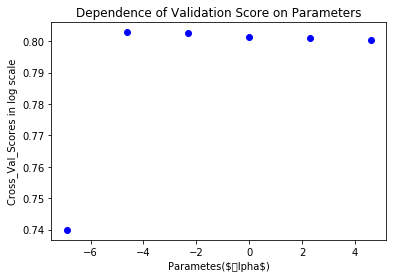

In [22]:
cross_val_scores = np.array([0.80053333, 0.80106667, 0.80124444, 0.80248889, 0.80284444, 0.73991111])
parameters = np.array([100, 10, 1, 0.1, 0.01, 0.001])
#curve fitting
result = np.polyfit(parameters,cross_val_scores,3)
plt.plot(np.log(parameters),cross_val_scores,'bo')
#plt.plot(np.log(parameters,np.log(result),'b--',label='fitted data')
plt.xlabel('Parametes($\alpha\$)')
plt.ylabel('Cross_Val_Scores in log scale')
plt.title('Dependence of Validation Score on Parameters')

### kNN

In [23]:
# prepare a range of C's values to test
Ks = np.array([1000, 500, 200, 100,50,25,15,7,3,5])
# create and fit a ridge regression model, testing each alpha
grid = GridSearchCV(estimator=KNeighborsClassifier(), param_grid=dict(n_neighbors=Ks))
pipeline_3 = Pipeline([('transformer',ct),
                 ('model',grid)
                ])
pipeline_3.fit(X_train, y_train)
# summarize the results of the grid search
print(grid.best_score_)
print(grid.best_estimator_.n_neighbors)
print(grid.cv_results_)

0.7921777777777778
50
{'mean_fit_time': array([0.01174984, 0.01129584, 0.01178608, 0.01141253, 0.01115541,
       0.01117129, 0.01072674, 0.0108079 , 0.01079178, 0.0108314 ]), 'std_fit_time': array([3.12127333e-04, 1.36043187e-04, 4.34944776e-04, 2.65736287e-04,
       8.31300183e-05, 3.19262380e-04, 8.74803740e-05, 2.48439875e-04,
       2.74908387e-04, 2.45234963e-04]), 'mean_score_time': array([0.52449894, 0.36904221, 0.28701777, 0.24035487, 0.2087019 ,
       0.18331423, 0.16547513, 0.14787607, 0.12742786, 0.14012117]), 'std_score_time': array([0.01091551, 0.00444221, 0.00293906, 0.00391278, 0.00383377,
       0.00689294, 0.00196894, 0.00327714, 0.00218619, 0.00405906]), 'param_n_neighbors': masked_array(data=[1000, 500, 200, 100, 50, 25, 15, 7, 3, 5],
             mask=[False, False, False, False, False, False, False, False,
                   False, False],
       fill_value='?',
            dtype=object), 'params': [{'n_neighbors': 1000}, {'n_neighbors': 500}, {'n_neighbors': 20

Text(0.5, 1.0, 'Dependence of Validation Score on Parameters')

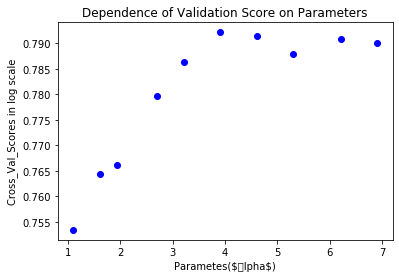

In [24]:
cross_val_scores = np.array([0.79004444, 0.79093333, 0.78791111, 0.79146667, 0.79217778,
       0.78631111, 0.77973333, 0.76622222, 0.75342222, 0.76444444])
parameters = np.array([1000, 500, 200, 100,50,25,15,7,3,5])
#curve fitting
result = np.polyfit(parameters,cross_val_scores,3)
plt.plot(np.log(parameters),cross_val_scores,'bo')
#plt.plot(np.log(parameters,np.log(result),'b--',label='fitted data')
plt.xlabel('Parametes($\alpha\$)')
plt.ylabel('Cross_Val_Scores in log scale')
plt.title('Dependence of Validation Score on Parameters')

#### 3d. Use RandomSearchCV to tune the decision tree model with max_depth, max_leaf_nodes, min_samples_split, min_samples_leaf, and min_weight_fraction_leaf.

In [25]:
from sklearn.model_selection import RandomizedSearchCV
md = np.linspace(1,1000,num=50,endpoint=True)
mln = np.array([2,3,4,5,6,7,8,9,10])
mss = np.linspace(0.1,1,num=10,endpoint=True)
msl = np.linspace(0.1,0.5,num=10,endpoint=True)
mwfl = np.linspace(0,0.01,num=10,endpoint=True)
# create and fit a ridge regression model, testing each alpha
grid = RandomizedSearchCV(estimator=tree.DecisionTreeClassifier(random_state=11), 
                          param_distributions=dict(max_depth = md, 
                                                            max_leaf_nodes = mln, 
                                                            min_samples_split = mss,
                                                            min_samples_leaf = msl,
                                                            min_weight_fraction_leaf = mwfl))
pipeline_RSCV = Pipeline([('transformer',ct),
                 ('model',grid)
                ])
pipeline_RSCV.fit(X_train, y_train)
# summarize the results of the grid search
print(grid.best_score_)
print(grid.best_estimator_)
print(grid.cv_results_)

0.7612444444444445
DecisionTreeClassifier(ccp_alpha=0.0, class_weight=None, criterion='gini',
                       max_depth=918.4489795918367, max_features=None,
                       max_leaf_nodes=7, min_impurity_decrease=0.0,
                       min_impurity_split=None,
                       min_samples_leaf=0.23333333333333334,
                       min_samples_split=0.1,
                       min_weight_fraction_leaf=0.005555555555555556,
                       presort='deprecated', random_state=11, splitter='best')
{'mean_fit_time': array([0.00636201, 0.007022  , 0.00592861, 0.00592084, 0.00592575,
       0.00596676, 0.00586782, 0.00600901, 0.00625463, 0.0059586 ]), 'std_fit_time': array([3.05871446e-04, 1.23666005e-04, 1.30846288e-04, 1.03398639e-04,
       1.32660314e-04, 6.58057047e-05, 8.20986475e-05, 1.36745275e-04,
       3.25920148e-04, 7.32235276e-05]), 'mean_score_time': array([0.00178337, 0.00166821, 0.00168643, 0.00160189, 0.00160089,
       0.00163641, 0.001

#### 4. Is polynomial kernel and Gaussian RBF kernel helpful for improving the performance of the SVM model?

### SVM kernel = 'Poly'

In [26]:
# prepare a range of C's values to test
Cs = np.array([100,10,1,0.1,0.01,0.001])
# create and fit svm with polynomial kernel
grid = GridSearchCV(estimator=svm.SVC(kernel = 'poly'), param_grid=dict(C=Cs))
pipeline_2 = Pipeline([('transformer',ct),
                 ('model',grid)
                ])
pipeline_2.fit(X_train, y_train)
# summarize the results of the grid search
print(grid.best_score_)
print(grid.best_estimator_.C)
print(grid.cv_results_)

0.8001777777777779
0.1
{'mean_fit_time': array([5.77781949, 1.0985321 , 0.62133937, 0.54977665, 0.55386243,
       0.54168539]), 'std_fit_time': array([0.44308448, 0.04303725, 0.01241852, 0.0086365 , 0.02384795,
       0.01103644]), 'mean_score_time': array([0.07920566, 0.0896347 , 0.09408188, 0.09642358, 0.10522637,
       0.10489345]), 'std_score_time': array([0.00199429, 0.00192666, 0.00115094, 0.00107157, 0.00184863,
       0.00095959]), 'param_C': masked_array(data=[100.0, 10.0, 1.0, 0.1, 0.01, 0.001],
             mask=[False, False, False, False, False, False],
       fill_value='?',
            dtype=object), 'params': [{'C': 100.0}, {'C': 10.0}, {'C': 1.0}, {'C': 0.1}, {'C': 0.01}, {'C': 0.001}], 'split0_test_score': array([0.74666667, 0.76177778, 0.79466667, 0.80444444, 0.78666667,
       0.736     ]), 'split1_test_score': array([0.76177778, 0.78933333, 0.81244444, 0.80888889, 0.78577778,
       0.736     ]), 'split2_test_score': array([0.76266667, 0.784     , 0.792     , 0.7

### SVM Kernel = 'rbf'

In [27]:
# prepare a range of C's values to test
Cs = np.array([100,10,1,0.1,0.01,0.001])
# create and fit a svm testing each C's
grid = GridSearchCV(estimator=svm.SVC(), param_grid=dict(C=Cs))
pipeline_2 = Pipeline([('transformer',ct),
                 ('model',grid)
                ])
pipeline_2.fit(X_train, y_train)
# summarize the results of the grid search
print(grid.best_score_)
print(grid.best_estimator_.C)
print(grid.cv_results_)

0.8001777777777777
1.0
{'mean_fit_time': array([1.79154263, 0.88929195, 0.67282953, 0.6397296 , 0.68051524,
       0.66263285]), 'std_fit_time': array([0.04400188, 0.02743851, 0.01672257, 0.00746848, 0.0219759 ,
       0.01365965]), 'mean_score_time': array([0.11913309, 0.12408781, 0.12073102, 0.12242999, 0.1369895 ,
       0.13496757]), 'std_score_time': array([0.00179104, 0.0020128 , 0.00192543, 0.00196001, 0.00339452,
       0.00380242]), 'param_C': masked_array(data=[100.0, 10.0, 1.0, 0.1, 0.01, 0.001],
             mask=[False, False, False, False, False, False],
       fill_value='?',
            dtype=object), 'params': [{'C': 100.0}, {'C': 10.0}, {'C': 1.0}, {'C': 0.1}, {'C': 0.01}, {'C': 0.001}], 'split0_test_score': array([0.75644444, 0.77333333, 0.79466667, 0.79466667, 0.736     ,
       0.736     ]), 'split1_test_score': array([0.76355556, 0.79022222, 0.81511111, 0.80622222, 0.736     ,
       0.736     ]), 'split2_test_score': array([0.76088889, 0.78844444, 0.79733333, 0.8

#### 5.       Choose the best model by analyzing the accuracy, precision, recall, ROC curve, and auc score

### precesion score, and recall score for df_test

In [28]:
from sklearn.metrics import roc_curve
from sklearn.metrics import roc_auc_score
X_test = df_test.drop(['Churn'],axis = 1)
y_test = df_test['Churn'].values
y_test_new = [1 if item == 'Yes' else 0 for item in y_test]

##### Logistic Regression

In [29]:
model = LogisticRegression(C=10000)
pipeline = Pipeline([('transformer',ct),
                 ('model',model)
                ])
pipeline.fit(X_train,y_train)
y_test_predict = pipeline.predict(X_test)
y_probs =pipeline.predict_proba(X_test)
y_probs = y_probs[:,1]

In [30]:
# Cross Validation
TP = 0
FP = 0
TN = 0
FN = 0

for i in range(len(y_test_predict)): 
    if y_test[i]==y_test_predict[i]=='Yes':
           TP += 1
    if y_test_predict[i]=='Yes' and y_test[i]!=y_test_predict[i]:
           FP += 1
    if y_test[i]==y_test_predict[i]=='No':
           TN += 1
    if y_test[i]=='No' and y_test[i]!=y_test_predict[i]:
           FN += 1
#precision score
PPV = TP/(TP + FP )
print('precesion score is', PPV)
#recall score
TPR = TP/(TP + FN)
print('recall score is', TPR)
#Accuracy score
ACC = (TP + TN)/(TP + TN + FP + FN)
print('accuracy score is', ACC)
#auc score
auc = roc_auc_score(y_test, y_probs)
print('auc score',auc)

precesion score is 0.6677524429967426
recall score is 0.6677524429967426
accuracy score is 0.8469617404351087
auc score 0.8390917509580309


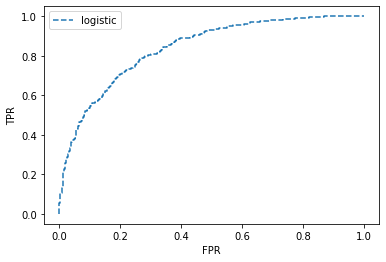

In [31]:
#ruc curve
FPR, TPR, _ = roc_curve(y_test_new, y_probs)
# plot the roc curve for the model
plt.plot(FPR, TPR, linestyle='--', label='logistic')
# axis labels
plt.xlabel('FPR')
plt.ylabel('TPR')
# show the legend
plt.legend()
# show the plot
plt.show()

##### SVM

In [32]:
model_svm_linear = svm.SVC(kernel = 'linear',C=1,probability=True)
pipeline_svm = Pipeline([('transformer_svm',ct),
                 ('model_svm',model_svm_linear)
                ])
pipeline_svm.fit(X_train,y_train)
y_test_predict = pipeline_svm.predict(X_test)
y_probs =pipeline_svm.predict_proba(X_test)
y_probs = y_probs[:,1]

In [33]:
# Cross Validation
TP = 0
FP = 0
TN = 0
FN = 0

for i in range(len(y_test_predict)): 
    if y_test[i]==y_test_predict[i]=='Yes':
           TP += 1
    if y_test_predict[i]=='Yes' and y_test[i]!=y_test_predict[i]:
           FP += 1
    if y_test[i]==y_test_predict[i]=='No':
           TN += 1
    if y_test[i]=='No' and y_test[i]!=y_test_predict[i]:
           FN += 1
#precision score
PPV = TP/(TP + FP )
print('precesion score is', PPV)
#recall score
TPR = TP/(TP + FN)
print('recall score is', TPR)
#Accuracy score
ACC = (TP + TN)/(TP + TN + FP + FN)
print('accuracy score is', ACC)
#auc score
auc = roc_auc_score(y_test, y_probs)
print('auc score',auc)

precesion score is 0.6472602739726028
recall score is 0.6472602739726028
accuracy score is 0.8437025796661608
auc score 0.8204952085667654


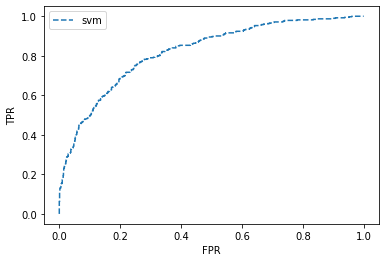

In [34]:
FPR, TPR, _ = roc_curve(y_test_new, y_probs)
# plot the roc curve for the model
plt.plot(FPR, TPR, linestyle='--', label='svm')
# axis labels
plt.xlabel('FPR')
plt.ylabel('TPR')
# show the legend
plt.legend()
# show the plot
plt.show()

##### KNN

In [35]:
model_knbrs = KNeighborsClassifier(n_neighbors= 50)
pipeline_knbrs = Pipeline([('transformer_knbrs',ct),
                 ('model_knbrs',model_knbrs)
                ])
pipeline_knbrs.fit(X_train,y_train)
y_test_predict = pipeline_knbrs.predict(X_test)
y_probs =pipeline_knbrs.predict_proba(X_test)
y_probs = y_probs[:,1]

In [36]:
# Cross Validation
TP = 0
FP = 0
TN = 0
FN = 0

for i in range(len(y_test_predict)): 
    if y_test[i]==y_test_predict[i]=='Yes':
           TP += 1
    if y_test_predict[i]=='Yes' and y_test[i]!=y_test_predict[i]:
           FP += 1
    if y_test[i]==y_test_predict[i]=='No':
           TN += 1
    if y_test[i]=='No' and y_test[i]!=y_test_predict[i]:
           FN += 1
#precision score
PPV = TP/(TP + FP )
print('precesion score is', PPV)
#recall score
TPR = TP/(TP + FN)
print('recall score is', TPR)
#Accuracy score
ACC = (TP + TN)/(TP + TN + FP + FN)
print('accuracy score is', ACC)
#auc score
auc = roc_auc_score(y_test, y_probs)
print('auc score',auc)

precesion score is 0.629080118694362
recall score is 0.629080118694362
accuracy score is 0.8165810711665444
auc score 0.8276491023417395


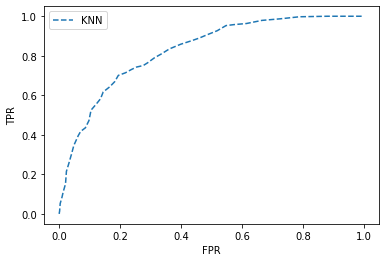

In [37]:
FPR, TPR, _ = roc_curve(y_test_new, y_probs)
# plot the roc curve for the model
plt.plot(FPR, TPR, linestyle='--', label='KNN')
# axis labels
plt.xlabel('FPR')
plt.ylabel('TPR')
# show the legend
plt.legend()
# show the plot
plt.show()

##### Decision Tree

In [38]:
model_dtree = tree.DecisionTreeClassifier()
pipeline_dtree = Pipeline([('transformer_dtree',ct),
                 ('model_dtree',model_dtree)
                ])
pipeline_dtree.fit(X_train,y_train)
y_test_predict = pipeline_dtree.predict(X_test)
y_probs =pipeline_dtree.predict_proba(X_test)
y_probs = y_probs[:,1]

In [39]:
# Cross Validation
TP = 0
FP = 0
TN = 0
FN = 0

for i in range(len(y_test_predict)): 
    if y_test[i]==y_test_predict[i]=='Yes':
           TP += 1
    if y_test_predict[i]=='Yes' and y_test[i]!=y_test_predict[i]:
           FP += 1
    if y_test[i]==y_test_predict[i]=='No':
           TN += 1
    if y_test[i]=='No' and y_test[i]!=y_test_predict[i]:
           FN += 1
#precision score
PPV = TP/(TP + FP )
print('precesion score is', PPV)
#recall score
TPR = TP/(TP + FN)
print('recall score is', TPR)
#Accuracy score
ACC = (TP + TN)/(TP + TN + FP + FN)
print('accuracy score is', ACC)
#auc score
auc = roc_auc_score(y_test, y_probs)
print('auc score',auc)

precesion score is 0.5245901639344263
recall score is 0.5245901639344263
accuracy score is 0.75
auc score 0.6670542278706388


#### On the basis of  precesion score, recall score, accuracy score and auc score, I found SVM model best.

#### 6. Which types of customers are less likely to end the service? 

In [46]:
ct.transformers_

[('ohe',
  OneHotEncoder(categories='auto', drop=None, dtype=<class 'numpy.float64'>,
                handle_unknown='error', sparse=True),
  Index(['gender', 'Partner', 'Dependents', 'PhoneService', 'MultipleLines',
         'InternetService', 'OnlineSecurity', 'OnlineBackup', 'DeviceProtection',
         'TechSupport', 'StreamingTV', 'StreamingMovies', 'Contract',
         'PaperlessBilling', 'PaymentMethod'],
        dtype='object')),
 ('ss',
  StandardScaler(copy=True, with_mean=True, with_std=True),
  Index(['SeniorCitizen', 'tenure', 'MonthlyCharges', 'TotalCharges'], dtype='object'))]

In [47]:
X_catg_trans

[array(['Female', 'Male'], dtype=object),
 array(['No', 'Yes'], dtype=object),
 array(['No', 'Yes'], dtype=object),
 array(['No', 'Yes'], dtype=object),
 array(['No', 'No phone service', 'Yes'], dtype=object),
 array(['DSL', 'Fiber optic', 'No'], dtype=object),
 array(['No', 'No internet service', 'Yes'], dtype=object),
 array(['No', 'No internet service', 'Yes'], dtype=object),
 array(['No', 'No internet service', 'Yes'], dtype=object),
 array(['No', 'No internet service', 'Yes'], dtype=object),
 array(['No', 'No internet service', 'Yes'], dtype=object),
 array(['No', 'No internet service', 'Yes'], dtype=object),
 array(['Month-to-month', 'One year', 'Two year'], dtype=object),
 array(['No', 'Yes'], dtype=object),
 array(['Bank transfer (automatic)', 'Credit card (automatic)',
        'Electronic check', 'Mailed check'], dtype=object)]

In [44]:
#To get the weights of all the variables
X_features = ['gender Female', 'gneder Male','SeniorCitizen', 'Partner No', 'Partner Yes', 
              'Dependents No', 'Dependent Yes', 'tenure', 'PhoneService No', 'PhoneService Yes',
              'MultipleLines No', 'MultipleLines No Internet Service', 'MultipleLines Yes', 
              'InternetService DSL', 'InternetService Fiber optic', 'InternetService No', 
              'OnlineSecurity No', 'OnlineSecurity No internet service', 'OnlineSecurity Yes', 
              'OnlineBackup No', 'OnlineBackup No internet service', 'OnlineBackup Yes',
              'DeviceProtection No', 'DeviceProtection No internet service', 'DeviceProtection Yes',
              'TechSupport No', 'TechSupport No internet service', 'TechSupport Yes', 
              'StreamingTV No', 'StreamingTV No internet service', 'StreamingTV Yes',
              'StreamingMovies No', 'StreamingMovies No internet service', 'StreamingMovies Yes',
              'Contract Month-to-month', 'Contract One year', 'Contract Two year',
              'PaperlessBilling No', 'PaperlessBilling Yes','PaymentMethod Bank transfer (automatic)', 
              'PaymentMethod Credit card (automatic)', 'PaymentMethod Electronic check', 
              'PaymentMethod Mailed check', 'MonthlyCharges', 'TotalCharges']
weights = pd.Series(pipeline_svm.named_steps['model_svm'].coef_[0],
                   index=X_features)
weights.sort_values()

MultipleLines No Internet Service         -0.737859
MonthlyCharges                            -0.480970
TotalCharges                              -0.449911
PaymentMethod Mailed check                -0.380860
OnlineBackup Yes                          -0.157688
TechSupport Yes                           -0.157688
OnlineSecurity Yes                        -0.157688
StreamingTV Yes                           -0.157688
InternetService No                        -0.157688
DeviceProtection Yes                      -0.157688
InternetService DSL                       -0.157688
StreamingMovies Yes                       -0.149484
PaperlessBilling Yes                      -0.130961
PhoneService No                           -0.124959
StreamingTV No internet service           -0.108622
Contract One year                         -0.102716
TechSupport No internet service           -0.090328
PaperlessBilling No                       -0.075798
Dependents No                             -0.065698
TechSupport 

#### Explanation
    Churn quantifies the number of customers who have unsubscribed or canceled their service contract. It can be observed that some features have positive relation with our predicted variable and some have negative relation. The positive realtion to churn means customrs having this type of attributes are likely to churn while neagtive ralation means customers are less likely to end the service. 
    customerts with following attribute are less likey to end the service:
                    MultipleLines 'No Internet Service'         -0.737859
                    MonthlyCharges                              -0.480970
                    TotalCharges                                -0.449911
                    PaymentMethod 'Mailed check'                -0.380860
                    OnlineBackup 'Yes'                          -0.157688
                    TechSupport 'Yes'                           -0.157688
                    OnlineSecurity 'Yes'                        -0.157688
                    StreamingTV 'Yes'                           -0.157688
                    InternetService 'No'                        -0.157688
                    DeviceProtection 'Yes'                      -0.157688
                    InternetService 'DSL'                       -0.157688
                    StreamingMovies 'Yes'                       -0.149484
                    PaperlessBilling 'Yes'                      -0.130961
                    PhoneService 'No'                           -0.124959
                    StreamingTV 'No internet service'           -0.108622
                    Contract 'One year'                         -0.102716
                    TechSupport 'No internet service'           -0.090328
                    PaperlessBilling 'No'                       -0.075798
                    Dependents 'No'                             -0.065698
                    TechSupport 'No'                            -0.047852
                    PhoneService 'Yes'                          -0.027653
                    Dependent 'Yes'                             -0.027653
                    SeniorCitizen                               -0.024429
                    PaymentMethod 'Credit card (automatic)'     -0.021651
                    gneder 'Male'                               -0.014147
                    OnlineSecurity 'No'                         -0.012089